In [1]:
! apt-get install default-jre
!java -version
! pip install h2o
import h2o
h2o.init()

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
default-jre set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.
openjdk version "11.0.5" 2019-10-15
OpenJDK Runtime Environment (build 11.0.5+10-post-Ubuntu-0ubuntu1.118.04)
OpenJDK 64-Bit Server VM (build 11.0.5+10-post-Ubuntu-0ubuntu1.118.04, mixed mode, sharing)
     |████████████████████████████████| 123.4MB 85kB/s 
  Created wheel for h2o: filename=h2o-3.28.0.1-py2.py3-none-any.whl size=123410554 sha256=b9771e9d7fb76a34cbee16b20973e5d5c8aabfe20de773711a8ff595e7535fd3
  Stored in directory: /root/.cache/pip/wheels/ff/82/f4/3fe9c895b93c53b25ae44dc44aa54dad571c711f48bc485fe9
Successfully built h2o
Checking whether there is an H2O instance running at h

H2O cluster uptime:,02 secs
H2O cluster timezone:,Etc/UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.28.0.1
H2O cluster version age:,3 days
H2O cluster name:,H2O_from_python_unknownUser_alpvtn
H2O cluster total nodes:,1
H2O cluster free memory:,3 Gb
H2O cluster total cores:,2
H2O cluster allowed cores:,2
H2O cluster status:,"accepting new members, healthy"


In [2]:
url = "http://h2o-public-test-data.s3.amazonaws.com/smalldata/iris/iris_wheader.csv"
iris=h2o.import_file(url)
train,test= iris.split_frame([0.8])
train.nrows

Parse progress: |█████████████████████████████████████████████████████████| 100%


123

In [0]:
x = ['sepal_len','sepal_wid','petal_len','petal_wid']

In [0]:
from h2o.estimators.deeplearning import H2OAutoEncoderEstimator as ae

In [8]:
m_AE_4 = ae(hidden=[4], activation='Tanh', epochs=300, model_id='m_AE_4',
            train_samples_per_iteration=train.nrow, score_interval=0, score_duty_cycle=1.0)

%time m_AE_4.train(x, None, train) #label is none

deeplearning Model Build progress: |██████████████████████████████████████| 100%
CPU times: user 168 ms, sys: 20.4 ms, total: 189 ms
Wall time: 5.05 s


In [9]:
sh = m_AE_4.score_history()
sh.head()

,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_mse
0,,2019-12-20 06:15:20,0.217 sec,0.00000 obs/sec,0.0,0,0.0,0.260462,0.067840
1,,2019-12-20 06:15:20,0.298 sec,1618 obs/sec,1.0,1,123.0,0.166128,0.027599
2,,2019-12-20 06:15:20,0.323 sec,2617 obs/sec,2.0,2,246.0,0.138724,0.019244
3,,2019-12-20 06:15:20,0.352 sec,3294 obs/sec,3.0,3,369.0,0.117704,0.013854
4,,2019-12-20 06:15:20,0.376 sec,3755 obs/sec,4.0,4,492.0,0.109060,0.011894


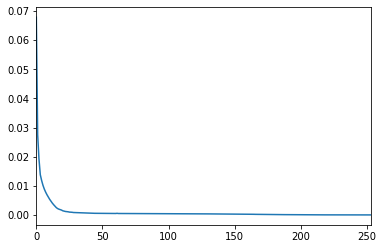

In [11]:
sh['training_mse'].plot()

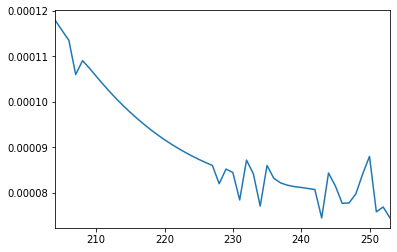

In [12]:
sh['training_mse'].tail(50).plot()

In [14]:
nm_AE_4 = ae(hidden=[4], activation='Tanh', epochs=300, model_id='m_AE_4',
            train_samples_per_iteration=train.nrow, score_interval=0, score_duty_cycle=1.0,
            stopping_rounds=15)

%time nm_AE_4.train(x, None, train)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
CPU times: user 185 ms, sys: 22.6 ms, total: 207 ms
Wall time: 4.1 s


In [15]:
sh = nm_AE_4.score_history()
sh.head()

,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_mse
0,,2019-12-20 06:19:12,0.051 sec,0.00000 obs/sec,0.0,0,0.0,0.313932,0.098553
1,,2019-12-20 06:19:12,0.065 sec,9461 obs/sec,1.0,1,123.0,0.258591,0.066870
2,,2019-12-20 06:19:12,0.075 sec,11181 obs/sec,2.0,2,246.0,0.230977,0.053350
3,,2019-12-20 06:19:12,0.084 sec,12300 obs/sec,3.0,3,369.0,0.200761,0.040305
4,,2019-12-20 06:19:12,0.089 sec,14470 obs/sec,4.0,4,492.0,0.174788,0.030551


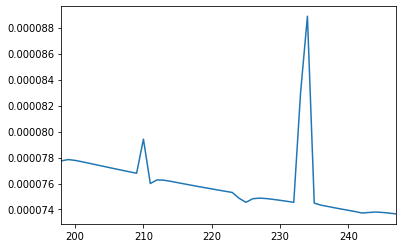

In [16]:
sh['training_mse'].tail(50).plot()

No. of hidden node is same as input to model should learn perfectly eventually

In [21]:
m_AE_3 = ae(hidden=[3], activation='Tanh', epochs=300, model_id='m_AE_3',
            train_samples_per_iteration=train.nrow, score_interval=0, score_duty_cycle=1.0,
            stopping_rounds=15)
%time m_AE_3.train(x, None, train)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
CPU times: user 164 ms, sys: 23 ms, total: 187 ms
Wall time: 2.81 s


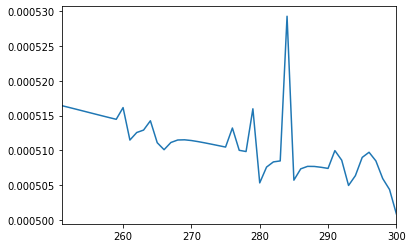

In [23]:
sh = m_AE_3.score_history()
sh['training_mse'].tail(50).plot()

Try with only 2 hidden neurons

In [24]:
m_AE_2 = ae(hidden=[2], activation='Tanh', epochs=300, model_id='m_AE_2',
            train_samples_per_iteration=train.nrow, score_interval=0, score_duty_cycle=1.0,
            stopping_rounds=15)
%time m_AE_2.train(x, None, train)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
CPU times: user 232 ms, sys: 24 ms, total: 256 ms
Wall time: 2.17 s


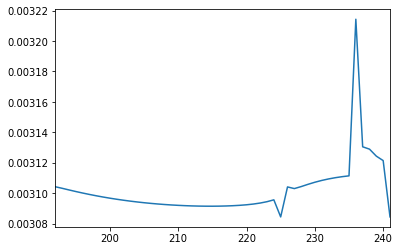

In [25]:
sh = m_AE_2.score_history()
sh['training_mse'].tail(50).plot()

Increase in mse let's try only one hidden neuron

In [26]:
m_AE_1 = ae(hidden=[1], activation='Tanh', epochs=300, model_id='m_AE_1',
            train_samples_per_iteration=train.nrow, score_interval=0, score_duty_cycle=1.0,
            stopping_rounds=15)
%time m_AE_1.train(x, None, train)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
CPU times: user 68.6 ms, sys: 12.8 ms, total: 81.4 ms
Wall time: 1.14 s


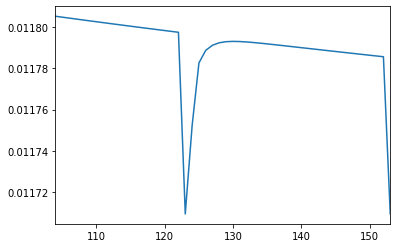

In [27]:
sh = m_AE_1.score_history()
sh['training_mse'].tail(50).plot()

Now it's quite high MSE

Now let's try Multiple layer auto encoders
<br> Its strongly recomended to have symmetry 

In [28]:
mm_AE_1 = ae(hidden=[5,3,5], activation='Tanh', epochs=300, model_id='m_AE_1',
            train_samples_per_iteration=train.nrow, score_interval=0, score_duty_cycle=1.0,
            stopping_rounds=15)
%time mm_AE_1.train(x, None, train)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
CPU times: user 135 ms, sys: 14.8 ms, total: 150 ms
Wall time: 1.92 s


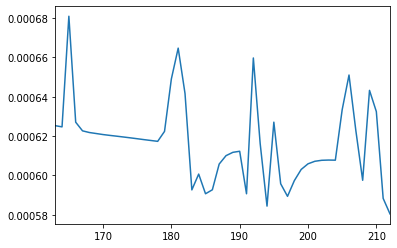

In [29]:
sh = mm_AE_1.score_history()
sh['training_mse'].tail(50).plot()

Now Stacked autoencoders 

In [30]:
train_AE_3 = m_AE_3.deepfeatures(train, 0) #0 is the first layer

deepfeatures progress: |██████████████████████████████████████████████████| 100%


In [31]:
train_AE_3.dim

[123, 3]

In [32]:
train_AE_3

DF.L1.C1,DF.L1.C2,DF.L1.C3
0.460519,0.292908,0.259209
0.399518,0.423897,0.174625
0.375157,0.44802,0.13234
0.427083,0.162501,0.351542
0.440751,0.324609,0.223644
0.34201,0.513954,0.074066
0.45509,0.381084,0.131722
0.501954,0.189058,0.311185
0.411574,0.363196,0.222791
0.385135,0.526469,0.133241


Now we will use ↑ data as training data

In [33]:
m_AE_3x3 = ae(hidden=[3], activation='Tanh', epochs=300, model_id='m_AE_3x3',
            train_samples_per_iteration=train.nrow, score_interval=0, score_duty_cycle=1.0,
            stopping_rounds=15)

%time m_AE_3x3.train([0,1,2], None, train_AE_3)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
CPU times: user 128 ms, sys: 7.62 ms, total: 135 ms
Wall time: 1.93 s


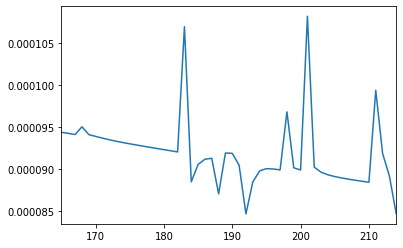

In [34]:
sh = m_AE_3x3.score_history()
sh['training_mse'].tail(50).plot()

Finding Anomalies

In [0]:
x.append('class')

In [36]:
x

['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']

In [37]:
m_anomly16 = ae(hidden=[16], activation='Tanh', epochs=300, model_id='anomy_model',
                train_samples_per_iteration=train.nrow, score_interval=0, score_duty_cycle=1.0,
                stopping_rounds=15)
%time m_anomly16.train(x, None, iris)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
CPU times: user 131 ms, sys: 11.7 ms, total: 143 ms
Wall time: 2.78 s


In [0]:
anomalies = m_anomly16.anomaly(iris).cbind(iris).as_data_frame()
#             RE error  appends -    original data

In [39]:
s = anomalies.sort_values('Reconstruction.MSE', ascending=False)
s.head()

,Reconstruction.MSE,sepal_len,sepal_wid,petal_len,petal_wid,class
118,0.000458,7.7,2.6,6.9,2.3,Iris-virginica
15,0.000161,5.7,4.4,1.5,0.4,Iris-setosa
41,0.000160,4.5,2.3,1.3,0.3,Iris-setosa
106,0.000157,4.9,2.5,4.5,1.7,Iris-virginica
135,0.000141,7.7,3.0,6.1,2.3,Iris-virginica


In [40]:
s.tail()

,Reconstruction.MSE,sepal_len,sepal_wid,petal_len,petal_wid,class
111,2.784281e-06,6.4,2.7,5.3,1.9,Iris-virginica
86,2.278759e-06,6.7,3.1,4.7,1.5,Iris-versicolor
75,2.085380e-06,6.6,3.0,4.4,1.4,Iris-versicolor
51,1.185308e-06,6.4,3.2,4.5,1.5,Iris-versicolor
65,6.297687e-07,6.7,3.1,4.4,1.4,Iris-versicolor
